<a href="https://colab.research.google.com/github/ShrutiThakur3/VCET-DS/blob/main/DataSet_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:** Given the features of passengers aboard the Titanic, predict whether a passenger survived or not.

In [96]:
#1. Import the datset
import pandas as pd
df=pd.read_csv("tested.csv")
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [98]:
#2. dealing with missing value

df['Fare'].fillna(df['Fare'].median(), inplace=True) #Imputing Neurimical Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


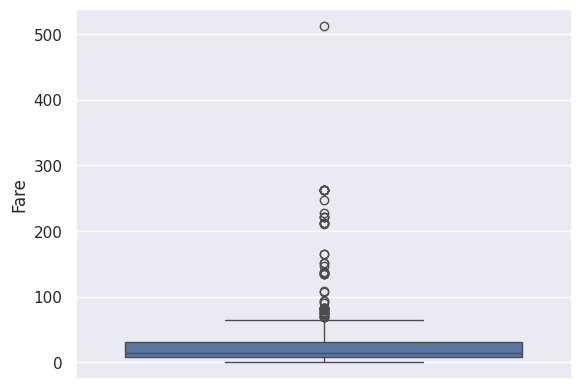

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64
23.576075
66.8359875
-27.468312499999996
0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64


In [99]:
#3. Dealong with outliers

#identify
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Fare'])
plt.show()

print(df['Fare'])
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Fare'] < lower].values
out2=df[df['Fare'] > upper].values

df['Fare'].replace(out1,lower,inplace=True)
df['Fare'].replace(out2,upper,inplace=True)

print(df['Fare'])

In [100]:
# 4. Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verify the conversion
print(df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age  SibSp  Parch   Ticket  \
0                              Kelly, Mr. James  34.5      0      0   330911   
1              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   363272   
2                     Myles, Mr. Thomas Francis  62.0      0      0   240276   
3                              Wirz, Mr. Albert  27.0      0      0   315154   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1  3101298   

      Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0   7.8292   NaN      True        True       False  
1   7.0000   NaN     False       False        True  
2   9.6875   NaN      True        True       False  
3   8.6625   NaN      True       False        True  
4  12.2875   NaN     False       Fals

In [101]:
#5. Select features and target

# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

print(y)


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [102]:
#6. Dealing with class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Verify the balancing
print(y_sm.value_counts())


Survived
0    266
1    266
Name: count, dtype: int64


In [103]:
# 7. Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)
print(X_sm)


[[ 0.93341409  0.33416873 -0.48822256 ...  1.          2.46846781
  -1.42828569]
 [ 0.93341409  1.31287391  0.67130602 ... -1.         -0.4051096
   0.70014004]
 [-0.22410641  2.48732012 -0.48822256 ...  1.          2.46846781
  -1.42828569]
 ...
 [-1.38162692  0.01968054 -0.48822256 ... -1.         -0.4051096
   0.70014004]
 [-0.22410641 -0.0794311  -0.48822256 ... -1.         -0.4051096
   0.70014004]
 [-1.38162692 -0.25246773 -0.48822256 ... -1.         -0.4051096
   0.70014004]]


In [104]:
#8. Dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Check explained variance ratio
print(pca.explained_variance_ratio_)


[0.96337041 0.03642889]


In [105]:
#9. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_sm, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(425, 2) (107, 2) (425,) (107,)


In [106]:
#10. Train a Random Forest Classifier and a Gradient Boosting Classifier

#Initialize the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train)
#Make predictions
y_pred = rf_classifier.predict(X_test)
# Verify predictions
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0]


In [107]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.5981308411214953
Confusion Matrix:
[[35 16]
 [27 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        51
           1       0.64      0.52      0.57        56

    accuracy                           0.60       107
   macro avg       0.60      0.60      0.60       107
weighted avg       0.61      0.60      0.60       107



In [108]:
# Initialize and train the Gradient Boosting classifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)
print(y_pred_gbm)

# Evaluate the Gradient Boosting model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

print(f'Gradient Boosting Accuracy: {accuracy_gbm}')
print('Gradient Boosting Confusion Matrix:')
print(conf_matrix_gbm)
print('Gradient Boosting Classification Report:')
print(class_report_gbm)


[0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0]
Gradient Boosting Accuracy: 0.5887850467289719
Gradient Boosting Confusion Matrix:
[[29 22]
 [22 34]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        51
           1       0.61      0.61      0.61        56

    accuracy                           0.59       107
   macro avg       0.59      0.59      0.59       107
weighted avg       0.59      0.59      0.59       107



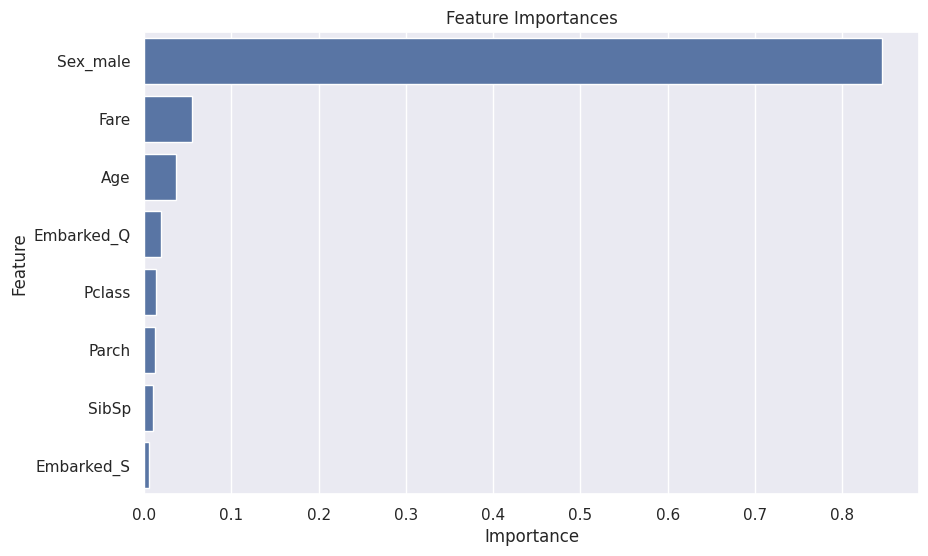

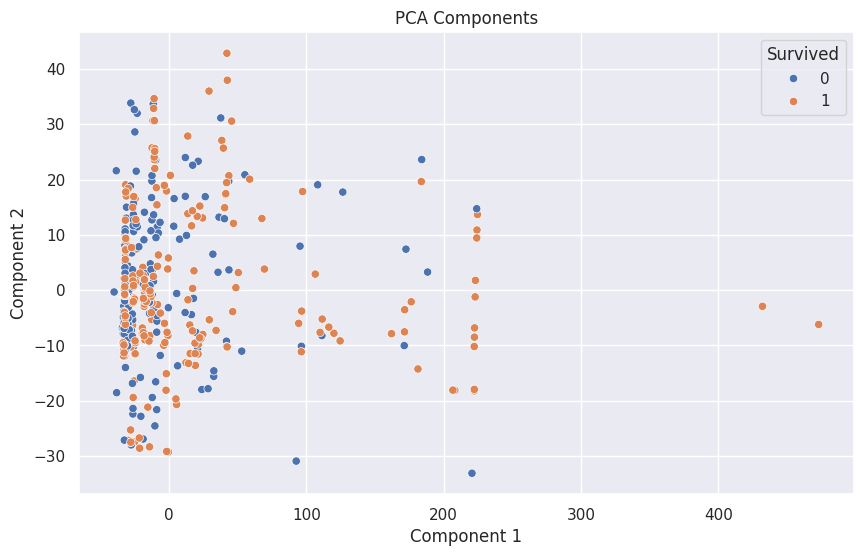

In [109]:
#11. Visualize feature importances
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_sm)
plt.title('PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Survived')
plt.show()
